In [1]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [2]:
import numpy as np
import copy

import src.mcmc as mcmc
import src.utils as utils
from src.ansatz import RBM
from src.model import Model
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
visible_layer_size = 2
hidden_layer_size = 3
seed = 44  # Seed for random number generator
gradient_steps = 200


In [4]:
np.random.seed(seed)

b = utils.random_complex_array(visible_layer_size)  # Visible layer bias
c = utils.random_complex_array(hidden_layer_size)  # Hidden layer bias
W = utils.random_complex_matrix(visible_layer_size, hidden_layer_size)  # Visible - hidden weights
#H = random_hamiltonian(2**visible_layer_size)  # Hamiltonian
H = np.diag([-2, 0, 2, -7])  # Hamiltonian

In [5]:
walker = mcmc.Walker()
rbm = RBM(visible_bias=b, hidden_bias=c, weights=W)  # Initializing RBM currently with random configuration and parameters
model_1 = Model(rbm, walker, H)  # Initializing model with RBM and Hamiltonian
model_2 = copy.deepcopy(model_1)  # Cloning model to have two copies to train on
model_3 = copy.deepcopy(model_1)
model_4 = copy.deepcopy(model_1)

In [6]:
print(f"Estimated energy before training: {model_1.estimate_energy()}")
print(f"Exact energy (target): {min(np.linalg.eigvalsh(H))}")

Estimated energy before training: -0.255
Exact energy (target): -7.0


In [7]:
# Training models
fd_plot_exact_list = model_1.gradient_descent(gradient_method='finite_difference', exact_dist=True, n_steps=gradient_steps)
analytic_plot_est_list = model_2.gradient_descent(gradient_method='analytical', exact_dist=False, n_steps=gradient_steps)
fd_plot_est_list = model_3.gradient_descent(gradient_method='finite_difference', exact_dist=False, n_steps=gradient_steps)
analytic_plot_exact_list = model_4.gradient_descent(gradient_method='analytical', exact_dist=True, n_steps=gradient_steps)


Gradient descent step 1, energy: (-0.32377996563576755-1.6267200660557478e-20j)
Gradient descent step 2, energy: (-0.41309322487680983+0j)
Gradient descent step 3, energy: (-0.522343673979325+0j)
Gradient descent step 4, energy: (-0.6538786615111085+0j)
Gradient descent step 5, energy: (-0.8094873882007675+0j)
Gradient descent step 6, energy: (-0.9901743908224494+0j)
Gradient descent step 7, energy: (-1.195855918702464+4.699197914566999e-18j)
Gradient descent step 8, energy: (-1.424703493511829+0j)
Gradient descent step 9, energy: (-1.673000031088869+0j)
Gradient descent step 10, energy: (-1.9356579907076756+0j)
Gradient descent step 11, energy: (-2.2068657694664178+0j)
Gradient descent step 12, energy: (-2.481154226787927+0j)
Gradient descent step 13, energy: (-2.756290658289806-1.4494898267187058e-16j)
Gradient descent step 14, energy: (-3.038524734371135+0j)
Gradient descent step 15, energy: (-3.34966045960983+0j)
Gradient descent step 16, energy: (-3.7300168619889362+0j)
Gradient d

Gradient descent step 132, energy: (-6.993423766458379+0j)
Gradient descent step 133, energy: (-6.99344931065392+3.0485565338291736e-16j)
Gradient descent step 134, energy: (-6.993474752690851+0j)
Gradient descent step 135, energy: (-6.993500092846414+0j)
Gradient descent step 136, energy: (-6.993525331355727+2.6144367692209316e-21j)
Gradient descent step 137, energy: (-6.993550468417498-2.992968625593395e-16j)
Gradient descent step 138, energy: (-6.9935755041992-2.9792452128836205e-16j)
Gradient descent step 139, energy: (-6.993600438841679-2.5599448573656626e-21j)
Gradient descent step 140, energy: (-6.993625272463302+0j)
Gradient descent step 141, energy: (-6.993650005163649-2.5243216488724324e-21j)
Gradient descent step 142, energy: (-6.993674637026818+0j)
Gradient descent step 143, energy: (-6.99369916812439-2.9116951983064255e-16j)
Gradient descent step 144, energy: (-6.993723598518045+2.898396812386217e-16j)
Gradient descent step 145, energy: (-6.993747928261916+2.88519294974264

Gradient descent step 47, energy: (-0.05999215445515411+0j)
Gradient descent step 48, energy: (-0.05988386441402435+0j)
Gradient descent step 49, energy: (-0.05978256159011406+0j)
Gradient descent step 50, energy: (-0.05969504829390295+2.826270662921127e-18j)
Gradient descent step 51, energy: (-0.059621145620312704-2.7520438465598133e-18j)
Gradient descent step 52, energy: (-0.05955634772310495-2.6822222868339985e-18j)
Gradient descent step 53, energy: (-0.05950242624379342+0j)
Gradient descent step 54, energy: (-0.05945813019971957+0j)
Gradient descent step 55, energy: (-0.059418128977665186+2.507624956061708e-18j)
Gradient descent step 56, energy: (-0.05937378621729631+0j)
Gradient descent step 57, energy: (-0.05933581610102635+4.816313079001462e-18j)
Gradient descent step 58, energy: (-0.05930489001876491-2.3636598945313926e-18j)
Gradient descent step 59, energy: (-0.05922081270594756+0j)
Gradient descent step 60, energy: (-0.05912138712558359+2.2740414963743742e-18j)
Gradient desce

Gradient descent step 5, energy: (-0.3852445037170074-3.9299615634213803e-19j)
Gradient descent step 6, energy: (-0.38692791225143874+0j)
Gradient descent step 7, energy: (-0.39189798742109955+0j)
Gradient descent step 8, energy: (-0.40132273772145327+1.271084596072022e-17j)
Gradient descent step 9, energy: (-0.4030186105349524+0j)
Gradient descent step 10, energy: (-0.4053920560990014+0j)
Gradient descent step 11, energy: (-0.4121682042555862+0j)
Gradient descent step 12, energy: (-0.41593199943394504-1.2838148361607316e-17j)
Gradient descent step 13, energy: (-0.4202281191716875-2.5533962997103778e-17j)
Gradient descent step 14, energy: (-0.42129028533988716+0j)
Gradient descent step 15, energy: (-0.42390422648149284+2.4225109671395248e-17j)
Gradient descent step 16, energy: (-0.4234241947551693+2.3264480624922832e-17j)
Gradient descent step 17, energy: (-0.430029791147817+0j)
Gradient descent step 18, energy: (-0.43980738391970786-2.1592003071309908e-17j)
Gradient descent step 19, e

Gradient descent step 129, energy: (-6.308119556671062+0j)
Gradient descent step 130, energy: (-6.333873522866605+2.147248389962878e-16j)
Gradient descent step 131, energy: (-6.357459156876354+0j)
Gradient descent step 132, energy: (-6.363787957899588+0j)
Gradient descent step 133, energy: (-6.375459020425305-1.9088027262434332e-16j)
Gradient descent step 134, energy: (-6.392902438727396-3.651709500500849e-16j)
Gradient descent step 135, energy: (-6.406067725004164-4.974258983632739e-19j)
Gradient descent step 136, energy: (-6.414274906573636+3.46942460230434e-16j)
Gradient descent step 137, energy: (-6.421482044313072+3.375874495732093e-16j)
Gradient descent step 138, energy: (-6.426805193642815+0j)
Gradient descent step 139, energy: (-6.435198504495177+0j)
Gradient descent step 140, energy: (-6.438497871954225+0j)
Gradient descent step 141, energy: (-6.4466133596924635+0j)
Gradient descent step 142, energy: (-6.458053780734562+6.429711262945581e-20j)
Gradient descent step 143, energy

Gradient descent step 66, energy: (-6.97487563515569+0j)
Gradient descent step 67, energy: (-6.977075656799512-7.53785897860277e-21j)
Gradient descent step 68, energy: (-6.979007562851212+0j)
Gradient descent step 69, energy: (-6.980710347092153+0j)
Gradient descent step 70, energy: (-6.9822166345203085+6.1361886968942375e-21j)
Gradient descent step 71, energy: (-6.983553812864902+0j)
Gradient descent step 72, energy: (-6.984744950101055+5.422827239506484e-21j)
Gradient descent step 73, energy: (-6.985809540303256+5.116579998174998e-21j)
Gradient descent step 74, energy: (-6.986764111554754-2.877554557639893e-16j)
Gradient descent step 75, energy: (-6.987622722783635+1.5411054135430278e-24j)
Gradient descent step 76, energy: (-6.9883973709640825+0j)
Gradient descent step 77, energy: (-6.9890983258122805+0j)
Gradient descent step 78, energy: (-6.989734405686917+0j)
Gradient descent step 79, energy: (-6.990313205688793+0j)
Gradient descent step 80, energy: (-6.990841286794755+0j)
Gradien

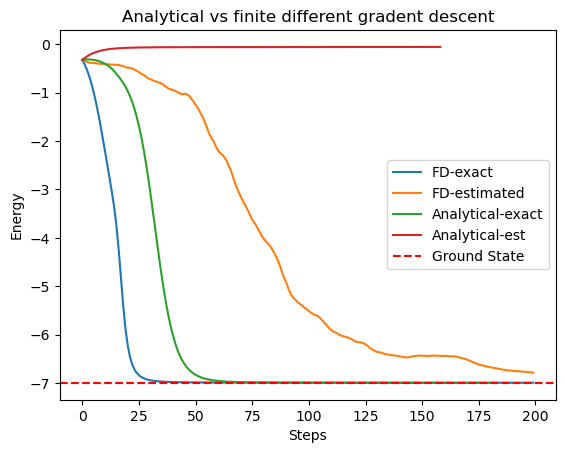

In [8]:
plt.plot(np.real(fd_plot_exact_list), label='FD-exact')
plt.plot(np.real(fd_plot_est_list), label='FD-estimated')
plt.plot(np.real(analytic_plot_exact_list), label='Analytical-exact')
plt.plot(np.real(analytic_plot_est_list), label='Analytical-est')
plt.axhline(y=min(np.linalg.eigvalsh(H)), color='red', linestyle='--', label='Ground State')
plt.title('Analytical vs finite different gradent descent')
plt.xlabel('Steps')
plt.ylabel('Energy')
plt.legend()


In [10]:
print(f"Estimated energy FD-exact: {model_1.estimate_energy()}")
print(f"Estimated energy Analytic-estimated: {model_2.estimate_energy()}")
print(f"Estimated energy FD-estimated: {model_3.estimate_energy()}")
print(f"Estimated energy Analytic-exact: {model_4.estimate_energy()}")

Estimated energy FD-exact: -7.0
Estimated energy Analytic-estimated: -0.11199999999999999
Estimated energy FD-estimated: -6.742999999999999
Estimated energy Analytic-exact: -7.0
